# Iris flower classification

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


# Loading the Dataset

In [4]:
df=pd.read_csv('Iris.csv')
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.drop(columns=['Id'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#basic statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#basic info about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#no of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Pre processing the dataset

In [9]:
#check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA(exploratory data analysis)

<AxesSubplot:>

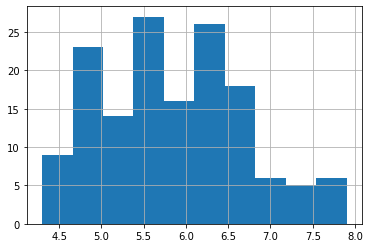

In [10]:
#histograms
df['SepalLengthCm'].hist()

<AxesSubplot:>

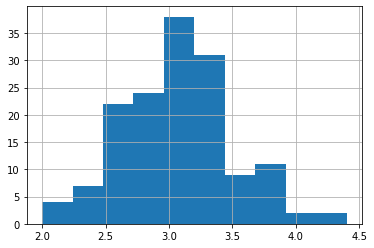

In [11]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

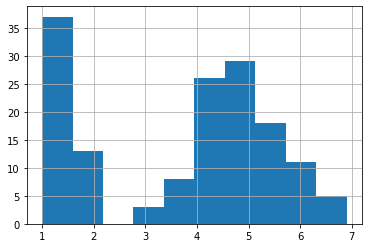

In [12]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

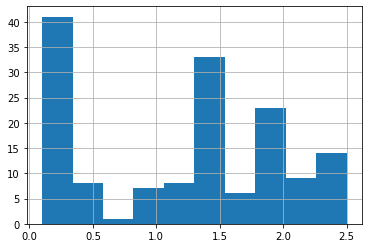

In [13]:
df['PetalWidthCm'].hist()

In [14]:
#scatter plots
colors=['red','orange','blue']
species=['Iris-versicolor','Iris-virginica','Iris-setosa']

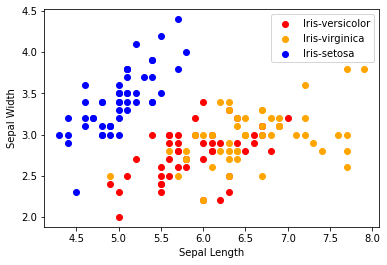

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

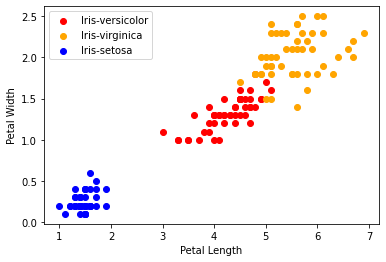

In [16]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

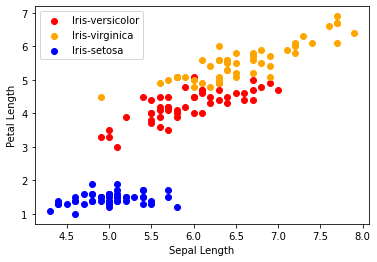

In [17]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

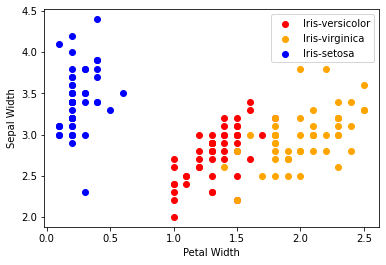

In [18]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalWidthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
    plt.xlabel('Petal Width')
    plt.ylabel('Sepal Width')
    plt.legend()

# Correlation matrix

Table showing correlation between variables each cell in table shows correlation between 2 variables
The value is in the range of -1 to 1. If 2 variables have hig correlation we can neglect that variable
from those 2.

In [19]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

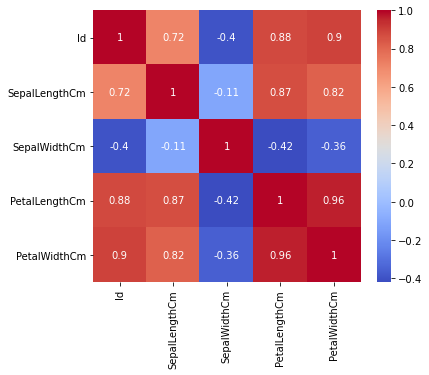

In [20]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm') 
#blue- negetive correlation
#red/dark-positive correlation
#light colour- medium correlation

# Lable encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['Species']= le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Model training

In [23]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=df.drop (columns=['Species'])
Y=df['Species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [25]:
model.fit(X_train,Y_train)

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#print metric to get erformance
print("Accuracy:",model.score(X_test,Y_test)*100)

Accuracy: 100.0


In [27]:
#knn 
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [28]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [29]:
#print metric to get erformance
print("Accuracy:",model.score(X_test,Y_test)*100)

Accuracy: 97.77777777777777


In [30]:
#descision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()


In [31]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
#print metric to get erformance
print("Accuracy:",model.score(X_test,Y_test)*100)

Accuracy: 100.0
